**IMPORT:**

In [1]:
import pandas as pd
import numpy as np
import sklearn

!pip install xgboost
import xgboost as xg

!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download uciml/adult-census-income

  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 74.4MB/s]


In [4]:
from zipfile import ZipFile
zip = ZipFile('/content/adult-census-income.zip')
zip.extractall()

**EDA:**

In [85]:
df=pd.read_csv("/content/adult.csv")

In [17]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [18]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [19]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [20]:
df.duplicated().count()

32561

In [86]:
df=df.drop(['education','fnlwgt'],axis=1)

In [90]:
df=df.dropna()

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education.num   32561 non-null  int64 
 3   marital.status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital.gain    32561 non-null  int64 
 9   capital.loss    32561 non-null  int64 
 10  hours.per.week  32561 non-null  int64 
 11  native.country  32561 non-null  object
 12  income          32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.5+ MB


**Checking ratio of balance for 'income':**

In [117]:
print(sum(df['income'])/len(df['income']))

0.2408095574460244


**LABEL ENCODING:**

In [109]:
from sklearn.preprocessing import OneHotEncoder
from xgboost.sklearn import XGBClassifier
from imblearn.pipeline import Pipeline

In [111]:
objcol=df.columns[df.dtypes == 'object']
encoder= preprocessing.LabelEncoder()
for col in objcol:
  df[col]=encoder.fit_transform(df[col])

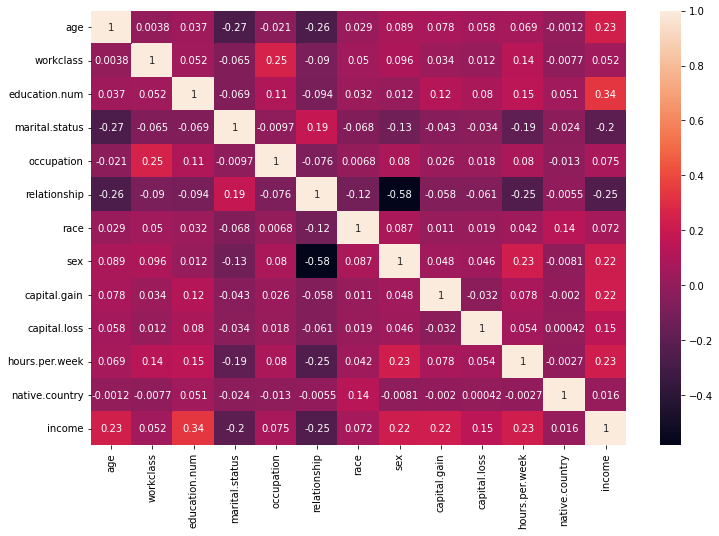

In [113]:
corr=df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   education.num   32561 non-null  int64
 3   marital.status  32561 non-null  int64
 4   occupation      32561 non-null  int64
 5   relationship    32561 non-null  int64
 6   race            32561 non-null  int64
 7   sex             32561 non-null  int64
 8   capital.gain    32561 non-null  int64
 9   capital.loss    32561 non-null  int64
 10  hours.per.week  32561 non-null  int64
 11  native.country  32561 non-null  int64
 12  income          32561 non-null  int64
dtypes: int64(13)
memory usage: 3.5 MB


**S-K-FOLD:**

In [150]:
from sklearn.model_selection import StratifiedKFold

In [151]:
target=df.loc[:,['income']]

In [153]:
skf=StratifiedKFold(n_splits=20)

In [154]:
xgb=xg.XGBClassifier()

In [155]:
df.columns

Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native.country', 'income'],
      dtype='object')

In [161]:

def training(train, test, foldnum):

  x=['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native.country']

  y=['income']    

  x_train=train[x]
  y_train=train[y]

  x_test=test[x]
  y_test=test[y]

  eval_set=[(x_train,y_train),(x_test,y_test)]
  eval_metric=["auc","error"]

  xgb.fit(x_train, y_train.values.ravel(), eval_metric=eval_metric,eval_set=eval_set)

  preds=xgb.predict(x_test)

  print('Fold.No:',str(foldnum),'Accuracy:',accuracy_score(y_test,preds))


In [162]:
foldnum=1

for train_i,test_i in skf.split(df, target):

  train = df.loc[train_i,:]
  test = df.loc[test_i,:]
  training(train,test,foldnum)
  foldnum += 1 

[0]	validation_0-auc:0.854719	validation_0-error:0.156796	validation_1-auc:0.584079	validation_1-error:0.35175
[1]	validation_0-auc:0.854719	validation_0-error:0.156796	validation_1-auc:0.584079	validation_1-error:0.35175
[2]	validation_0-auc:0.857329	validation_0-error:0.154791	validation_1-auc:0.595612	validation_1-error:0.347452
[3]	validation_0-auc:0.863443	validation_0-error:0.15492	validation_1-auc:0.588317	validation_1-error:0.35175
[4]	validation_0-auc:0.864218	validation_0-error:0.15492	validation_1-auc:0.583801	validation_1-error:0.35175
[5]	validation_0-auc:0.866323	validation_0-error:0.15492	validation_1-auc:0.579541	validation_1-error:0.352363


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-auc:0.866314	validation_0-error:0.15492	validation_1-auc:0.580184	validation_1-error:0.359116
[7]	validation_0-auc:0.882869	validation_0-error:0.151332	validation_1-auc:0.586334	validation_1-error:0.421117
[8]	validation_0-auc:0.887344	validation_0-error:0.15463	validation_1-auc:0.58436	validation_1-error:0.362799
[9]	validation_0-auc:0.886199	validation_0-error:0.149037	validation_1-auc:0.581821	validation_1-error:0.440761
[10]	validation_0-auc:0.892544	validation_0-error:0.149263	validation_1-auc:0.588722	validation_1-error:0.438306
[11]	validation_0-auc:0.897267	validation_0-error:0.148002	validation_1-auc:0.585095	validation_1-error:0.435236
[12]	validation_0-auc:0.897984	validation_0-error:0.146677	validation_1-auc:0.588056	validation_1-error:0.432167
[13]	validation_0-auc:0.898739	validation_0-error:0.146968	validation_1-auc:0.588839	validation_1-error:0.432167
[14]	validation_0-auc:0.898547	validation_0-error:0.146968	validation_1-auc:0.595174	validation_1-error

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[7]	validation_0-auc:0.87635	validation_0-error:0.15915	validation_1-auc:0.874915	validation_1-error:0.179975
[8]	validation_0-auc:0.880835	validation_0-error:0.159021	validation_1-auc:0.874471	validation_1-error:0.179975
[9]	validation_0-auc:0.879262	validation_0-error:0.158762	validation_1-auc:0.872223	validation_1-error:0.179975
[10]	validation_0-auc:0.887773	validation_0-error:0.159021	validation_1-auc:0.881511	validation_1-error:0.179975
[11]	validation_0-auc:0.89044	validation_0-error:0.156952	validation_1-auc:0.883469	validation_1-error:0.179361
[12]	validation_0-auc:0.891738	validation_0-error:0.156984	validation_1-auc:0.883306	validation_1-error:0.179361
[13]	validation_0-auc:0.894621	validation_0-error:0.156855	validation_1-auc:0.888514	validation_1-error:0.179975
[14]	validation_0-auc:0.894671	validation_0-error:0.15679	validation_1-auc:0.887811	validation_1-error:0.179975
[15]	validation_0-auc:0.896152	validation_0-error:0.156823	validation_1-auc:0.890775	validation_1-error

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-auc:0.856787	validation_0-error:0.161413	validation_1-auc:0.987608	validation_1-error:0.050369
[7]	validation_0-auc:0.87438	validation_0-error:0.161413	validation_1-auc:0.986956	validation_1-error:0.050369
[8]	validation_0-auc:0.879069	validation_0-error:0.161413	validation_1-auc:0.986948	validation_1-error:0.04914
[9]	validation_0-auc:0.88109	validation_0-error:0.161122	validation_1-auc:0.986725	validation_1-error:0.054668
[10]	validation_0-auc:0.885596	validation_0-error:0.160508	validation_1-auc:0.987129	validation_1-error:0.054668
[11]	validation_0-auc:0.885596	validation_0-error:0.160896	validation_1-auc:0.989127	validation_1-error:0.05344
[12]	validation_0-auc:0.888825	validation_0-error:0.160702	validation_1-auc:0.991519	validation_1-error:0.052826
[13]	validation_0-auc:0.889363	validation_0-error:0.159603	validation_1-auc:0.989973	validation_1-error:0.05344
[14]	validation_0-auc:0.891389	validation_0-error:0.159247	validation_1-auc:0.990118	validation_1-error:0

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[7]	validation_0-auc:0.873033	validation_0-error:0.161446	validation_1-auc:0.988359	validation_1-error:0.040541
[8]	validation_0-auc:0.8744	validation_0-error:0.160217	validation_1-auc:0.992231	validation_1-error:0.040541
[9]	validation_0-auc:0.878561	validation_0-error:0.160605	validation_1-auc:0.994039	validation_1-error:0.040541
[10]	validation_0-auc:0.883539	validation_0-error:0.160799	validation_1-auc:0.993944	validation_1-error:0.038698
[11]	validation_0-auc:0.886517	validation_0-error:0.157631	validation_1-auc:0.994681	validation_1-error:0.038698
[12]	validation_0-auc:0.889731	validation_0-error:0.156952	validation_1-auc:0.997127	validation_1-error:0.034398
[13]	validation_0-auc:0.89065	validation_0-error:0.157566	validation_1-auc:0.995144	validation_1-error:0.038698
[14]	validation_0-auc:0.892338	validation_0-error:0.155433	validation_1-auc:0.995946	validation_1-error:0.033784
[15]	validation_0-auc:0.892822	validation_0-error:0.155206	validation_1-auc:0.996574	validation_1-erro

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[7]	validation_0-auc:0.874597	validation_0-error:0.16206	validation_1-auc:0.999637	validation_1-error:0.035627
[8]	validation_0-auc:0.878465	validation_0-error:0.162028	validation_1-auc:0.999761	validation_1-error:0.035627
[9]	validation_0-auc:0.880212	validation_0-error:0.161995	validation_1-auc:1	validation_1-error:0.035627
[10]	validation_0-auc:0.885054	validation_0-error:0.161737	validation_1-auc:0.999808	validation_1-error:0.035012
[11]	validation_0-auc:0.885406	validation_0-error:0.161349	validation_1-auc:0.999585	validation_1-error:0.035627
[12]	validation_0-auc:0.888303	validation_0-error:0.161349	validation_1-auc:0.99994	validation_1-error:0.035012
[13]	validation_0-auc:0.889174	validation_0-error:0.160864	validation_1-auc:0.999853	validation_1-error:0.035012
[14]	validation_0-auc:0.89097	validation_0-error:0.159668	validation_1-auc:0.999936	validation_1-error:0.035012
[15]	validation_0-auc:0.891205	validation_0-error:0.158245	validation_1-auc:0.999959	validation_1-error:0.035

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[7]	validation_0-auc:0.875093	validation_0-error:0.164	validation_1-auc:0.899612	validation_1-error:0.125921
[8]	validation_0-auc:0.879517	validation_0-error:0.164	validation_1-auc:0.903816	validation_1-error:0.125921
[9]	validation_0-auc:0.879699	validation_0-error:0.162836	validation_1-auc:0.903919	validation_1-error:0.125921
[10]	validation_0-auc:0.88651	validation_0-error:0.161737	validation_1-auc:0.909092	validation_1-error:0.12715
[11]	validation_0-auc:0.888871	validation_0-error:0.161284	validation_1-auc:0.908541	validation_1-error:0.12715
[12]	validation_0-auc:0.892127	validation_0-error:0.161219	validation_1-auc:0.910711	validation_1-error:0.12715
[13]	validation_0-auc:0.891912	validation_0-error:0.161349	validation_1-auc:0.910641	validation_1-error:0.12715
[14]	validation_0-auc:0.89287	validation_0-error:0.159409	validation_1-auc:0.911269	validation_1-error:0.12715
[15]	validation_0-auc:0.893301	validation_0-error:0.159247	validation_1-auc:0.911474	validation_1-error:0.12715


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-auc:0.858409	validation_0-error:0.157987	validation_1-auc:0.833018	validation_1-error:0.200246
[7]	validation_0-auc:0.877318	validation_0-error:0.158084	validation_1-auc:0.854006	validation_1-error:0.200246
[8]	validation_0-auc:0.881644	validation_0-error:0.157954	validation_1-auc:0.85725	validation_1-error:0.200246
[9]	validation_0-auc:0.882311	validation_0-error:0.15637	validation_1-auc:0.856745	validation_1-error:0.200246
[10]	validation_0-auc:0.888777	validation_0-error:0.155368	validation_1-auc:0.868182	validation_1-error:0.198403
[11]	validation_0-auc:0.889724	validation_0-error:0.155724	validation_1-auc:0.868112	validation_1-error:0.198403
[12]	validation_0-auc:0.892306	validation_0-error:0.153946	validation_1-auc:0.8714	validation_1-error:0.19656
[13]	validation_0-auc:0.892964	validation_0-error:0.152749	validation_1-auc:0.871518	validation_1-error:0.198403
[14]	validation_0-auc:0.896133	validation_0-error:0.152168	validation_1-auc:0.874498	validation_1-error:0

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[7]	validation_0-auc:0.879159	validation_0-error:0.158019	validation_1-auc:0.831247	validation_1-error:0.201474
[8]	validation_0-auc:0.883491	validation_0-error:0.15789	validation_1-auc:0.834266	validation_1-error:0.201474
[9]	validation_0-auc:0.884746	validation_0-error:0.156726	validation_1-auc:0.833967	validation_1-error:0.201474
[10]	validation_0-auc:0.888388	validation_0-error:0.156144	validation_1-auc:0.834301	validation_1-error:0.201474
[11]	validation_0-auc:0.896116	validation_0-error:0.154172	validation_1-auc:0.843732	validation_1-error:0.201474
[12]	validation_0-auc:0.89604	validation_0-error:0.153946	validation_1-auc:0.842844	validation_1-error:0.197174
[13]	validation_0-auc:0.898336	validation_0-error:0.155368	validation_1-auc:0.84722	validation_1-error:0.201474
[14]	validation_0-auc:0.898516	validation_0-error:0.15262	validation_1-auc:0.846121	validation_1-error:0.201474
[15]	validation_0-auc:0.900034	validation_0-error:0.1522	validation_1-auc:0.8471	validation_1-error:0.2

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-auc:0.858777	validation_0-error:0.158245	validation_1-auc:0.8271	validation_1-error:0.195332
[7]	validation_0-auc:0.879372	validation_0-error:0.158342	validation_1-auc:0.846565	validation_1-error:0.195332
[8]	validation_0-auc:0.88337	validation_0-error:0.158213	validation_1-auc:0.858216	validation_1-error:0.195332
[9]	validation_0-auc:0.883833	validation_0-error:0.15776	validation_1-auc:0.855942	validation_1-error:0.195332
[10]	validation_0-auc:0.890509	validation_0-error:0.156306	validation_1-auc:0.86376	validation_1-error:0.19226
[11]	validation_0-auc:0.893027	validation_0-error:0.15178	validation_1-auc:0.863733	validation_1-error:0.188575
[12]	validation_0-auc:0.895989	validation_0-error:0.154625	validation_1-auc:0.867028	validation_1-error:0.191646
[13]	validation_0-auc:0.896296	validation_0-error:0.153331	validation_1-auc:0.867556	validation_1-error:0.19226
[14]	validation_0-auc:0.897322	validation_0-error:0.152749	validation_1-auc:0.86857	validation_1-error:0.191

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-auc:0.858924	validation_0-error:0.158924	validation_1-auc:0.821092	validation_1-error:0.182432
[7]	validation_0-auc:0.878263	validation_0-error:0.158989	validation_1-auc:0.842426	validation_1-error:0.182432
[8]	validation_0-auc:0.882597	validation_0-error:0.157663	validation_1-auc:0.847771	validation_1-error:0.182432
[9]	validation_0-auc:0.883976	validation_0-error:0.157308	validation_1-auc:0.848684	validation_1-error:0.182432
[10]	validation_0-auc:0.890267	validation_0-error:0.156241	validation_1-auc:0.857264	validation_1-error:0.18059
[11]	validation_0-auc:0.89254	validation_0-error:0.152362	validation_1-auc:0.857088	validation_1-error:0.181204
[12]	validation_0-auc:0.895576	validation_0-error:0.154948	validation_1-auc:0.861551	validation_1-error:0.179361
[13]	validation_0-auc:0.895599	validation_0-error:0.154204	validation_1-auc:0.86246	validation_1-error:0.179975
[14]	validation_0-auc:0.8969	validation_0-error:0.153267	validation_1-auc:0.862549	validation_1-error:0

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-auc:0.859209	validation_0-error:0.15831	validation_1-auc:0.816407	validation_1-error:0.194103
[7]	validation_0-auc:0.879564	validation_0-error:0.158407	validation_1-auc:0.839666	validation_1-error:0.194103
[8]	validation_0-auc:0.883592	validation_0-error:0.158278	validation_1-auc:0.84823	validation_1-error:0.194103
[9]	validation_0-auc:0.884145	validation_0-error:0.157696	validation_1-auc:0.84728	validation_1-error:0.194103
[10]	validation_0-auc:0.89019	validation_0-error:0.15304	validation_1-auc:0.855905	validation_1-error:0.190418
[11]	validation_0-auc:0.892585	validation_0-error:0.150584	validation_1-auc:0.855539	validation_1-error:0.190418
[12]	validation_0-auc:0.895789	validation_0-error:0.1522	validation_1-auc:0.859933	validation_1-error:0.192875
[13]	validation_0-auc:0.896064	validation_0-error:0.150519	validation_1-auc:0.860711	validation_1-error:0.190418
[14]	validation_0-auc:0.898044	validation_0-error:0.150745	validation_1-auc:0.862771	validation_1-error:0.1

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-auc:0.859513	validation_0-error:0.158666	validation_1-auc:0.827091	validation_1-error:0.187346
[7]	validation_0-auc:0.878242	validation_0-error:0.158762	validation_1-auc:0.850568	validation_1-error:0.187346
[8]	validation_0-auc:0.88272	validation_0-error:0.157469	validation_1-auc:0.854071	validation_1-error:0.187346
[9]	validation_0-auc:0.882899	validation_0-error:0.157469	validation_1-auc:0.85108	validation_1-error:0.187346
[10]	validation_0-auc:0.885943	validation_0-error:0.157049	validation_1-auc:0.854248	validation_1-error:0.187346
[11]	validation_0-auc:0.891831	validation_0-error:0.15595	validation_1-auc:0.86154	validation_1-error:0.186732
[12]	validation_0-auc:0.894795	validation_0-error:0.155724	validation_1-auc:0.865107	validation_1-error:0.186732
[13]	validation_0-auc:0.895628	validation_0-error:0.155982	validation_1-auc:0.865069	validation_1-error:0.186732
[14]	validation_0-auc:0.896682	validation_0-error:0.153008	validation_1-auc:0.865876	validation_1-error:

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-auc:0.858995	validation_0-error:0.158795	validation_1-auc:0.824989	validation_1-error:0.184889
[7]	validation_0-auc:0.877544	validation_0-error:0.158892	validation_1-auc:0.853892	validation_1-error:0.184889
[8]	validation_0-auc:0.881681	validation_0-error:0.158762	validation_1-auc:0.859625	validation_1-error:0.184889
[9]	validation_0-auc:0.882382	validation_0-error:0.15831	validation_1-auc:0.859193	validation_1-error:0.184889
[10]	validation_0-auc:0.889085	validation_0-error:0.156176	validation_1-auc:0.865514	validation_1-error:0.184275
[11]	validation_0-auc:0.890062	validation_0-error:0.157081	validation_1-auc:0.86519	validation_1-error:0.184275
[12]	validation_0-auc:0.892273	validation_0-error:0.152006	validation_1-auc:0.869089	validation_1-error:0.179975
[13]	validation_0-auc:0.892973	validation_0-error:0.15317	validation_1-auc:0.869157	validation_1-error:0.184275
[14]	validation_0-auc:0.896017	validation_0-error:0.152749	validation_1-auc:0.873492	validation_1-error

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-auc:0.858551	validation_0-error:0.159215	validation_1-auc:0.846412	validation_1-error:0.176904
[7]	validation_0-auc:0.875919	validation_0-error:0.159312	validation_1-auc:0.865304	validation_1-error:0.176904
[8]	validation_0-auc:0.880431	validation_0-error:0.159183	validation_1-auc:0.868028	validation_1-error:0.176904
[9]	validation_0-auc:0.880753	validation_0-error:0.158019	validation_1-auc:0.865597	validation_1-error:0.176904
[10]	validation_0-auc:0.882789	validation_0-error:0.157599	validation_1-auc:0.868212	validation_1-error:0.176904
[11]	validation_0-auc:0.891937	validation_0-error:0.158375	validation_1-auc:0.877322	validation_1-error:0.176904
[12]	validation_0-auc:0.894867	validation_0-error:0.156726	validation_1-auc:0.881134	validation_1-error:0.172604
[13]	validation_0-auc:0.89618	validation_0-error:0.154883	validation_1-auc:0.883667	validation_1-error:0.173219
[14]	validation_0-auc:0.896409	validation_0-error:0.154366	validation_1-auc:0.88341	validation_1-erro

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[7]	validation_0-auc:0.878962	validation_0-error:0.158375	validation_1-auc:0.855008	validation_1-error:0.194717
[8]	validation_0-auc:0.883358	validation_0-error:0.158245	validation_1-auc:0.859785	validation_1-error:0.194717
[9]	validation_0-auc:0.882839	validation_0-error:0.156661	validation_1-auc:0.85641	validation_1-error:0.194717
[10]	validation_0-auc:0.885841	validation_0-error:0.154366	validation_1-auc:0.85997	validation_1-error:0.194717
[11]	validation_0-auc:0.891986	validation_0-error:0.154301	validation_1-auc:0.866774	validation_1-error:0.194717
[12]	validation_0-auc:0.893747	validation_0-error:0.154237	validation_1-auc:0.868146	validation_1-error:0.194103
[13]	validation_0-auc:0.895168	validation_0-error:0.153913	validation_1-auc:0.868001	validation_1-error:0.194103
[14]	validation_0-auc:0.898231	validation_0-error:0.152749	validation_1-auc:0.870804	validation_1-error:0.191646
[15]	validation_0-auc:0.898072	validation_0-error:0.152749	validation_1-auc:0.870976	validation_1-err

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-auc:0.860095	validation_0-error:0.15873	validation_1-auc:0.815026	validation_1-error:0.186118
[7]	validation_0-auc:0.877068	validation_0-error:0.158827	validation_1-auc:0.842743	validation_1-error:0.186118
[8]	validation_0-auc:0.881239	validation_0-error:0.158698	validation_1-auc:0.852064	validation_1-error:0.186118
[9]	validation_0-auc:0.882644	validation_0-error:0.157534	validation_1-auc:0.850864	validation_1-error:0.186118
[10]	validation_0-auc:0.88942	validation_0-error:0.156661	validation_1-auc:0.858429	validation_1-error:0.184275
[11]	validation_0-auc:0.891058	validation_0-error:0.156629	validation_1-auc:0.858079	validation_1-error:0.184275
[12]	validation_0-auc:0.892005	validation_0-error:0.156403	validation_1-auc:0.859718	validation_1-error:0.184275
[13]	validation_0-auc:0.892532	validation_0-error:0.153849	validation_1-auc:0.859284	validation_1-error:0.184275
[14]	validation_0-auc:0.896164	validation_0-error:0.154301	validation_1-auc:0.863725	validation_1-erro

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-auc:0.859142	validation_0-error:0.158375	validation_1-auc:0.818893	validation_1-error:0.192875
[7]	validation_0-auc:0.879517	validation_0-error:0.158472	validation_1-auc:0.842874	validation_1-error:0.192875
[8]	validation_0-auc:0.883844	validation_0-error:0.158342	validation_1-auc:0.84882	validation_1-error:0.192875
[9]	validation_0-auc:0.884241	validation_0-error:0.156758	validation_1-auc:0.847532	validation_1-error:0.192875
[10]	validation_0-auc:0.890001	validation_0-error:0.156758	validation_1-auc:0.855345	validation_1-error:0.192875
[11]	validation_0-auc:0.892455	validation_0-error:0.151456	validation_1-auc:0.855917	validation_1-error:0.190418
[12]	validation_0-auc:0.89536	validation_0-error:0.151747	validation_1-auc:0.859884	validation_1-error:0.191032
[13]	validation_0-auc:0.895645	validation_0-error:0.15317	validation_1-auc:0.859197	validation_1-error:0.190418
[14]	validation_0-auc:0.898007	validation_0-error:0.152491	validation_1-auc:0.863736	validation_1-error

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-auc:0.858531	validation_0-error:0.159247	validation_1-auc:0.8484	validation_1-error:0.17629
[7]	validation_0-auc:0.876163	validation_0-error:0.159344	validation_1-auc:0.864725	validation_1-error:0.17629
[8]	validation_0-auc:0.880155	validation_0-error:0.158051	validation_1-auc:0.871533	validation_1-error:0.17629
[9]	validation_0-auc:0.882273	validation_0-error:0.158051	validation_1-auc:0.871893	validation_1-error:0.17629
[10]	validation_0-auc:0.883799	validation_0-error:0.157631	validation_1-auc:0.87194	validation_1-error:0.17629
[11]	validation_0-auc:0.892762	validation_0-error:0.158633	validation_1-auc:0.882396	validation_1-error:0.17629
[12]	validation_0-auc:0.894693	validation_0-error:0.15679	validation_1-auc:0.88686	validation_1-error:0.175061
[13]	validation_0-auc:0.894886	validation_0-error:0.156887	validation_1-auc:0.8863	validation_1-error:0.175061
[14]	validation_0-auc:0.896332	validation_0-error:0.155724	validation_1-auc:0.88668	validation_1-error:0.174447
[

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-auc:0.860025	validation_0-error:0.158601	validation_1-auc:0.81554	validation_1-error:0.188575
[7]	validation_0-auc:0.879104	validation_0-error:0.158698	validation_1-auc:0.834379	validation_1-error:0.188575
[8]	validation_0-auc:0.88301	validation_0-error:0.157405	validation_1-auc:0.842673	validation_1-error:0.188575
[9]	validation_0-auc:0.884383	validation_0-error:0.157405	validation_1-auc:0.842316	validation_1-error:0.188575
[10]	validation_0-auc:0.89107	validation_0-error:0.156306	validation_1-auc:0.850356	validation_1-error:0.187961
[11]	validation_0-auc:0.893149	validation_0-error:0.156273	validation_1-auc:0.850395	validation_1-error:0.187961
[12]	validation_0-auc:0.89528	validation_0-error:0.154818	validation_1-auc:0.853345	validation_1-error:0.188575
[13]	validation_0-auc:0.895618	validation_0-error:0.153073	validation_1-auc:0.853097	validation_1-error:0.188575
[14]	validation_0-auc:0.896881	validation_0-error:0.152394	validation_1-auc:0.853768	validation_1-error:

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-auc:0.858917	validation_0-error:0.157954	validation_1-auc:0.820403	validation_1-error:0.20086
[7]	validation_0-auc:0.87713	validation_0-error:0.158051	validation_1-auc:0.839362	validation_1-error:0.20086
[8]	validation_0-auc:0.882109	validation_0-error:0.156758	validation_1-auc:0.844276	validation_1-error:0.20086
[9]	validation_0-auc:0.882913	validation_0-error:0.156338	validation_1-auc:0.843773	validation_1-error:0.20086
[10]	validation_0-auc:0.888976	validation_0-error:0.155368	validation_1-auc:0.850057	validation_1-error:0.199017
[11]	validation_0-auc:0.890977	validation_0-error:0.155336	validation_1-auc:0.854129	validation_1-error:0.199017
[12]	validation_0-auc:0.891014	validation_0-error:0.153267	validation_1-auc:0.855548	validation_1-error:0.197174
[13]	validation_0-auc:0.891811	validation_0-error:0.151909	validation_1-auc:0.855513	validation_1-error:0.199017
[14]	validation_0-auc:0.895369	validation_0-error:0.151974	validation_1-auc:0.861524	validation_1-error:0

In [ ]:
import matplotlib.pyplot as plt

results = xgb.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)


fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Error')
plt.title('XGBoost Error Plot')
plt.show()